# Phising detector with Logistic Regression

Phishing is the stealing of valuable information by websites that pose as a trusted website. Every year millions of people are victims of this cyber crime.

We are going to create a build an algorithm using LGR that predicts whether the Website will be a Phishing website(1) or not(-1).

We have data of around 11000+ websites that has the dependent variable 1:Phishing website and -1:Not Phishing website . We have to see which websites are most likely to be a phishing website and what are the features i.e. URL, Favicon , GoogleIndex etc of the Phishing website. We have 30 such identifiers. 

Then we will know which websites we need to put in the blacklist and which ones to trust. 

In [24]:
#importing packages

from statsmodels.stats.weightstats import ttest_ind
import scipy.stats as stats
from scipy.stats import ttest_ind
import pandas as pd
import numpy as np
import seaborn as sb
%matplotlib inline
from matplotlib import pyplot as plt
from scipy.stats import shapiro
from scipy import stats
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing as preproc
from sklearn import metrics
from sklearn.datasets import make_classification
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, auc, balanced_accuracy_score, confusion_matrix, f1_score, precision_score, average_precision_score, roc_auc_score,  recall_score,  precision_recall_curve as skm

In [2]:
#loading the dataset
phish=pd.read_csv("C:\\Users\\sujoydutta\\Desktop\\Data analysis\\Python\\Datasets_Py\\Classifier\\phishing.csv")
phish.head()

,Index,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,...,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport,class
0,0,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
1,1,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
2,2,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
3,3,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1
4,4,-1,0,-1,1,-1,-1,1,1,-1,...,1,1,1,1,1,-1,1,-1,-1,1


In [3]:
#understanding the dataset
phish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11054 entries, 0 to 11053
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Index                11054 non-null  int64
 1   UsingIP              11054 non-null  int64
 2   LongURL              11054 non-null  int64
 3   ShortURL             11054 non-null  int64
 4   Symbol@              11054 non-null  int64
 5   Redirecting//        11054 non-null  int64
 6   PrefixSuffix-        11054 non-null  int64
 7   SubDomains           11054 non-null  int64
 8   HTTPS                11054 non-null  int64
 9   DomainRegLen         11054 non-null  int64
 10  Favicon              11054 non-null  int64
 11  NonStdPort           11054 non-null  int64
 12  HTTPSDomainURL       11054 non-null  int64
 13  RequestURL           11054 non-null  int64
 14  AnchorURL            11054 non-null  int64
 15  LinksInScriptTags    11054 non-null  int64
 16  ServerFormHandler    1

In [4]:
#removing the useless column
phish=phish.drop(['Index'], axis=1)
phish.head()

,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,Favicon,...,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport,class
0,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
1,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
2,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
3,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1
4,-1,0,-1,1,-1,-1,1,1,-1,1,...,1,1,1,1,1,-1,1,-1,-1,1


In [5]:
#seeing the shape
phish.shape

(11054, 31)

In [6]:
#seeing null values
phish.isnull().sum()

UsingIP                0
LongURL                0
ShortURL               0
Symbol@                0
Redirecting//          0
PrefixSuffix-          0
SubDomains             0
HTTPS                  0
DomainRegLen           0
Favicon                0
NonStdPort             0
HTTPSDomainURL         0
RequestURL             0
AnchorURL              0
LinksInScriptTags      0
ServerFormHandler      0
InfoEmail              0
AbnormalURL            0
WebsiteForwarding      0
StatusBarCust          0
DisableRightClick      0
UsingPopupWindow       0
IframeRedirection      0
AgeofDomain            0
DNSRecording           0
WebsiteTraffic         0
PageRank               0
GoogleIndex            0
LinksPointingToPage    0
StatsReport            0
class                  0
dtype: int64

In [10]:
#summary statistics
phish.describe().round(2)

,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,Favicon,...,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport,class
count,11054.00,11054.00,11054.00,11054.00,11054.00,11054.00,11054.00,11054.00,11054.00,11054.00,...,11054.00,11054.00,11054.00,11054.00,11054.00,11054.00,11054.00,11054.00,11054.00,11054.00
mean,0.31,-0.63,0.74,0.70,0.74,-0.73,0.06,0.25,-0.34,0.63,...,0.61,0.82,0.06,0.38,0.29,-0.48,0.72,0.34,0.72,0.11
std,0.95,0.77,0.67,0.71,0.67,0.68,0.82,0.91,0.94,0.78,...,0.79,0.58,1.00,0.93,0.83,0.88,0.69,0.57,0.69,0.99
min,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,...,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00
25%,-1.00,-1.00,1.00,1.00,1.00,-1.00,-1.00,-1.00,-1.00,1.00,...,1.00,1.00,-1.00,-1.00,0.00,-1.00,1.00,0.00,1.00,-1.00
50%,1.00,-1.00,1.00,1.00,1.00,-1.00,0.00,1.00,-1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,-1.00,1.00,0.00,1.00,1.00
75%,1.00,-1.00,1.00,1.00,1.00,-1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


**Model 1: LR with all variables**

In the first model, we are going to predict the class using all the existing variables. 

In [11]:
#dividing the dataset into classes
X=phish.drop(['class'], axis=1) 
y=phish['class']

In [12]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.3, random_state=12)



In [25]:
#training the model 
lgr= LogisticRegression(C=100)
lgr.fit(X_train,y_train).score(X_train,y_train)

0.9287837663176942

In [26]:
#testing the model
test_data_prediction=lgr.predict(X_test)
lgr.score(X_test,y_test)

0.9240277359059391

In [27]:
#confusion matrix 
confusion_matrix = confusion_matrix(y_test,test_data_prediction)
confusion_matrix

class_names = [0,1] 

Text(0.5, 427.9555555555555, 'Predicted')

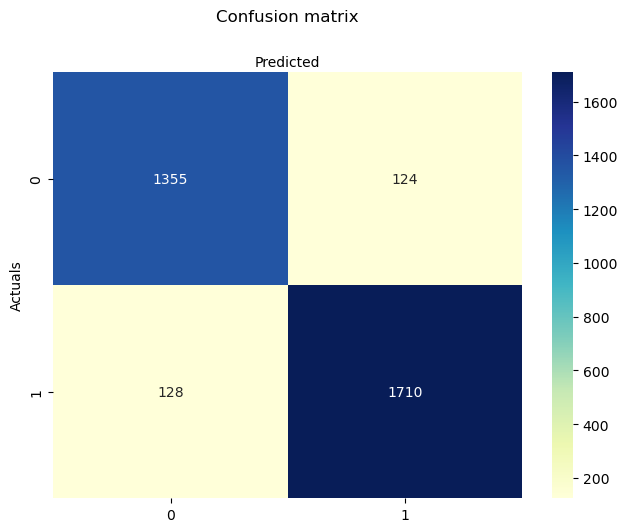

In [29]:
#plotting the matrix
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names)) 
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sb.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu" ,fmt='g') 
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y = 1.1)
plt.ylabel('Actuals')
plt.xlabel('Predicted')

In [30]:
#model metrics
print('Accuracy :- ',metrics.accuracy_score(y_test,test_data_prediction))
print('Precision :- ',metrics.precision_score(y_test,test_data_prediction))
print('Recall :-',metrics.recall_score(y_test,test_data_prediction))

Accuracy :-  0.9240277359059391
Precision :-  0.9323882224645583
Recall :- 0.9303590859630033


**Model 2: LR with two variables**

In the second model, we are going to predict the class using only two variables: parameter Prefix_Suffix and 13 URL_of_Anchor. 

In [31]:
#dividing the dataset into classes
X=phish[['PrefixSuffix-','AnchorURL']]
y=phish['class']

In [32]:
#Spilt the data 
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.25,random_state=100)  

In [34]:
#fitting the model
lgr.fit(X_train,y_train).score(X_train,y_train)

0.8490952955367913

In [35]:
#testing the model
test_data_prediction=lgr.predict(X_test)
lgr.score(X_test,y_test)

0.8484081041968162

In [38]:
#confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test,test_data_prediction)
confusion_matrix

class_names = [0,1] 

Text(0.5, 427.9555555555555, 'Predicted')

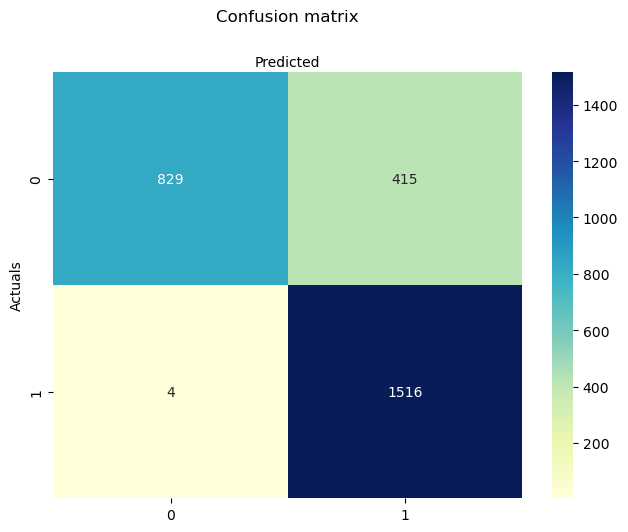

In [40]:
#plotting the matrix
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names)) 
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sb.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu" ,fmt='g') 
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y = 1.1)
plt.ylabel('Actuals')
plt.xlabel('Predicted')

In [41]:
#Model Metrics
print('Accuracy :- ',metrics.accuracy_score(y_test,test_data_prediction))
print('Precision :- ',metrics.precision_score(y_test,test_data_prediction))
print('Recall :-',metrics.recall_score(y_test,test_data_prediction))


Accuracy :-  0.8484081041968162
Precision :-  0.7850854479544278
Recall :- 0.9973684210526316


**Conclusion**

The first model is 93% accurate at predicting the classes while the second one is 85% accurate. the second one has two variables that are alone bringing the accuracy to 85% that leads us to conclude these two variables are having more weightage than other ones. 